# EDA 

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
import warnings
warnings.filterwarnings('ignore')

Cargamos los DataSets obtenidos en el ETL y luego revisamos su estreuctura

In [43]:
# Cargar el Dataset para iniciar el analisis
games = pd.read_parquet('../Dataset/games_sistem.parquet') 
reviews = pd.read_parquet('../Dataset/reviews_clean.parquet')

## Primero trabajare con el Datase Games

In [44]:
games.head(10)

,id,title,developer,release_date,genres,tags,price
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",4.99
1,643980,Ironbound,Secret Level SRL,2018-01-04,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...",0.00
2,670290,Real Pool 3D - Poolians,Poolians.com,2017-07-24,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...",0.00
3,767400,弹炸人2222,彼岸领域,2017-12-07,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",0.99
4,772540,Battle Royale Trainer,Trickjump Games Ltd,2018-01-04,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...",3.99
5,774277,SNOW - All Access Pro Pass,Poppermost Productions,2018-01-04,"[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]",18.99
6,774278,SNOW - All Access Legend Pass,Poppermost Productions,2018-01-04,"[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]",29.99
7,770380,Army of Tentacles: (Not) A Cthulhu Dating Sim:...,Stegalosaurus Game Development,2018-01-04,"[Action, Adventure, Casual, Indie, RPG]","[Action, Adventure, RPG, Indie, Casual]",10.99
8,768880,Beach Rules,Copperpick Studio,2018-01-04,"[Casual, Indie]","[Casual, Indie, Pixel Graphics, Cute, 2D]",3.99
9,765320,Planetarium 2 - Zen Odyssey,Ghulam Jewel,2018-01-03,"[Casual, Indie, Simulation]","[Indie, Casual, Simulation]",2.99


In [45]:
# Procedo a eliminar el id 767400 
games = games.drop(games[games['id'] == "767400"].index)

Procedo a desanidar la columna genres para generar diversas columnas que contengan el genero del juego. 

Esto permitira un analisis más fluido: 

In [46]:
# Utilizo la funcion explode en la columna "genres" para convertir los valores anidados en filas sepradas
games = games.explode(column='genres')
games

,id,title,developer,release_date,genres,tags,price
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Action,"[Strategy, Action, Indie, Casual, Simulation]",4.99
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Casual,"[Strategy, Action, Indie, Casual, Simulation]",4.99
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Indie,"[Strategy, Action, Indie, Casual, Simulation]",4.99
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Simulation,"[Strategy, Action, Indie, Casual, Simulation]",4.99
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Strategy,"[Strategy, Action, Indie, Casual, Simulation]",4.99
...,...,...,...,...,...,...,...
22528,610660,Russian Roads,Laush Dmitriy Sergeevich,2018-01-04,Indie,"[Indie, Simulation, Racing]",1.99
22528,610660,Russian Roads,Laush Dmitriy Sergeevich,2018-01-04,Racing,"[Indie, Simulation, Racing]",1.99
22528,610660,Russian Roads,Laush Dmitriy Sergeevich,2018-01-04,Simulation,"[Indie, Simulation, Racing]",1.99
22529,658870,EXIT 2 - Directions,"xropi,stev3ns",2017-09-02,Casual,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",4.99


In [47]:
# Ahora voy a restablecer el índice del Df resultante y descartare el índice anterior
games = games.reset_index(drop=True)

# Luego utilizo la funcion drop para sacar la columna "tags" ya que no la voy a utilizar para este analisis
games = games.drop(['tags'], axis=1)
games

,id,title,developer,release_date,genres,price
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Action,4.99
1,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Casual,4.99
2,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Indie,4.99
3,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Simulation,4.99
4,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Strategy,4.99
...,...,...,...,...,...,...
55604,610660,Russian Roads,Laush Dmitriy Sergeevich,2018-01-04,Indie,1.99
55605,610660,Russian Roads,Laush Dmitriy Sergeevich,2018-01-04,Racing,1.99
55606,610660,Russian Roads,Laush Dmitriy Sergeevich,2018-01-04,Simulation,1.99
55607,658870,EXIT 2 - Directions,"xropi,stev3ns",2017-09-02,Casual,4.99


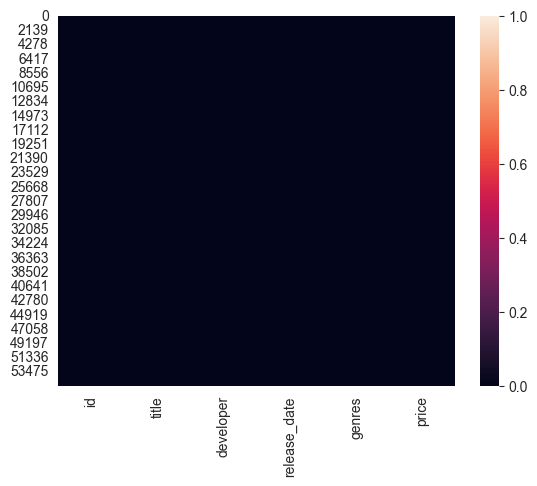

In [48]:
# Ahora procedemos a generar un grafico en el cual nos mostrara si dentro del dataset tenemos valores nulos
sns.heatmap(games.isnull())
plt.show()


## Obtenemos los 15 generos más jugados

* Obtenemos los 15 generos más jugados

In [50]:
top_genres = games['genres'].value_counts().nlargest(15)
top_genres.head(10)

genres
Indie           12693
Action           9429
Adventure        7020
Casual           6282
Strategy         5213
Simulation       4724
RPG              3809
Free to Play     1458
Early Access     1360
Sports           1032
Name: count, dtype: int64

* Creamos el grafico de barras

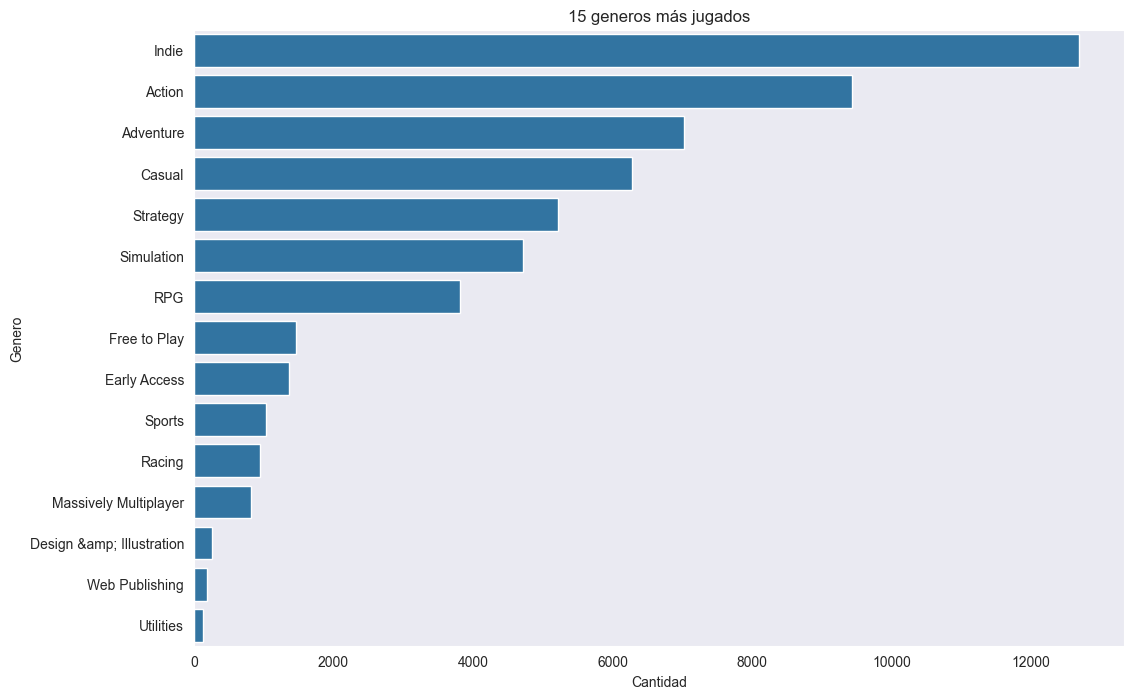

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.xlabel('Cantidad')
plt.ylabel('Genero')
plt.title('15 generos más jugados')
plt.show()

# Histograma

Gracias a un histograma nos fijaremos la distribucion de Precios de los Juegos

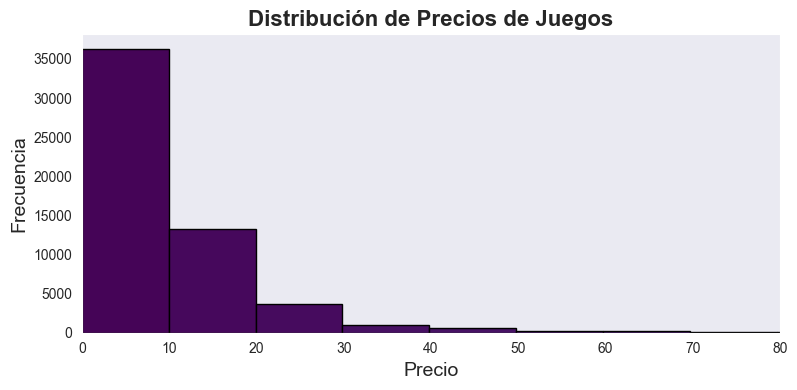

In [52]:
sns.set_style("dark")
plt.figure(figsize=(8, 4))

# Crear los datos
prices = games['price']

# Crear el gráfico con múltiples colores
n_bins = 100
colors = sns.color_palette("viridis", n_bins)
n, bins, patches = plt.hist(prices, bins=n_bins, edgecolor='black')

# Asignar los colores a cada barra del histograma
for color, patch in zip(colors, patches):
    patch.set_facecolor(color)

# Agregar título y etiquetas
plt.title('Distribución de Precios de Juegos', fontsize=16, fontweight='bold')
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar los márgenes
plt.tight_layout()

# Limitar el rango del eje x (precio)
plt.xlim(0, 80)

# Mostrar el gráfico
plt.show()

Cantidad de juegos por desarrollador

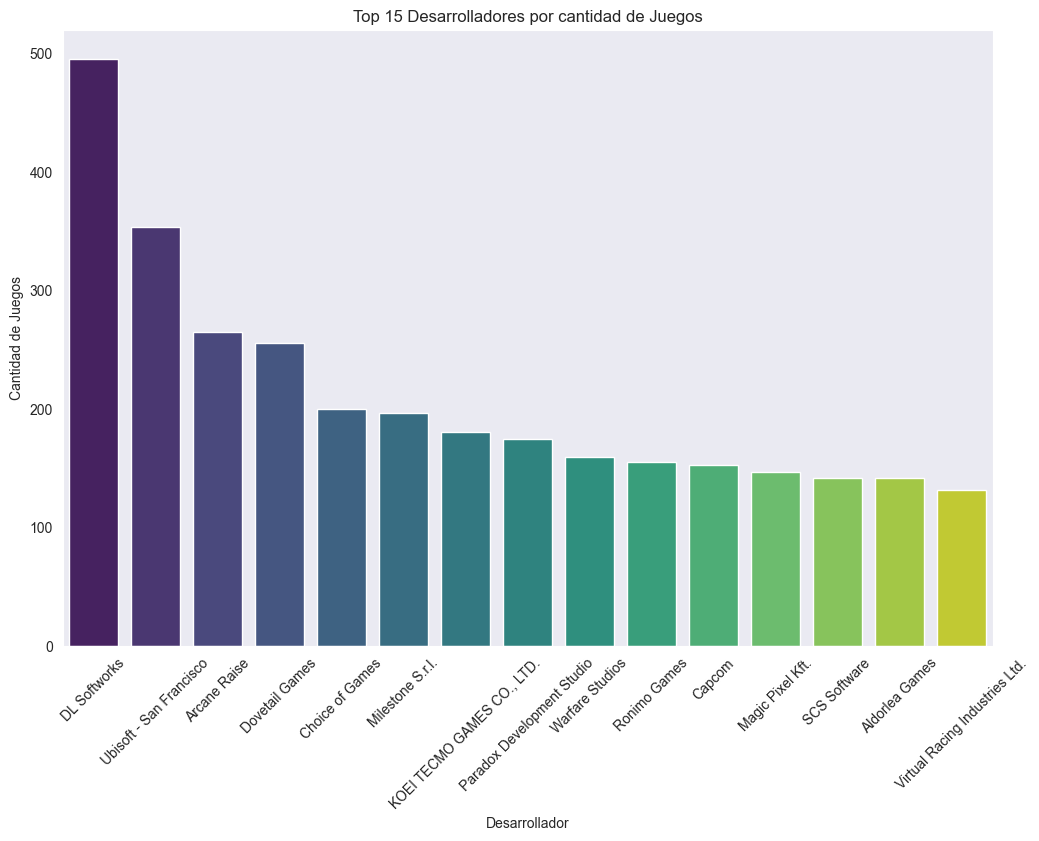

In [53]:
plt.figure(figsize=(12, 8))
top_developers = games['developer'].value_counts().head(15)
sns.barplot(x=top_developers.index, y=top_developers.values, palette= 'viridis')
plt.title('Top 15 Desarrolladores por cantidad de Juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

## Analisis de sentimientos positivos y negativos 

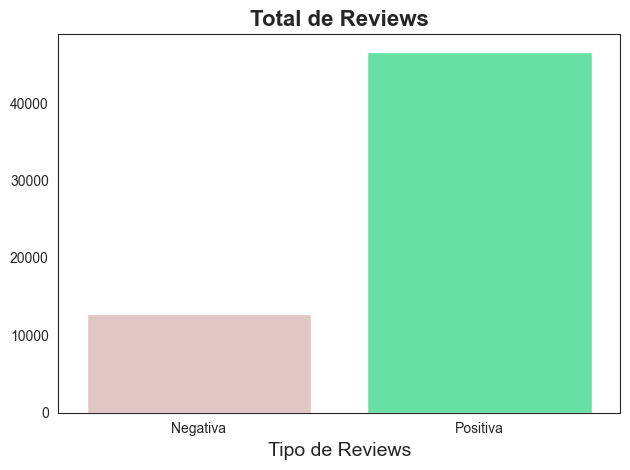

In [63]:
senti_columns = ['negativo', 'positivo']
totals = reviews[senti_columns].sum()

# Crear un DataFrame para los totales
totals_df = pd.DataFrame({'Sentimiento': totals.index, 'Total': totals.values})

# Cambiar los nombres de las barras
rename_dict = {
    'negativo': 'Negativa',
    'positivo': 'Positiva'
}
totals_df['Sentimiento'] = totals_df['Sentimiento'].replace(rename_dict)

# Establecer el estilo del gráfico
sns.set_style("white")

# Crear el gráfico de barras
colors = ['#E6C1C1', '#53F4A5']
sns.barplot(x='Sentimiento', y='Total', data=totals_df, palette=colors)

# Agregar título y etiquetas
plt.title('Total de Reviews', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Reviews', fontsize=14)
plt.ylabel('')

# Ajustar los márgenes y mostrar el gráfico
plt.tight_layout()
plt.show()